<a href="https://colab.research.google.com/github/alibagheribardi/Topological-Interventions-in-Graphs-for-Improving-Node-Centrality-and-Ranks/blob/main/Saleh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
from numpy.linalg import norm, eig

m = 100
N = 4 * m
pi = np.pi
w = np.exp(-2 * pi * 1j / N)

I = np.eye(N)
J = np.fliplr(np.eye(N - 1, dtype=int))
J_N = np.fliplr(np.eye(N, dtype=int))


F = np.zeros((N, N), dtype=complex)
G = np.zeros((N, N), dtype=complex)


for k in range(N):
    F[k] =np.sqrt(1/N) * np.array([w ** (k * l) for l in range(N)])
    G[k] =np.sqrt(1/N) * np.array([w ** ( (k+0.5) * (l+0.5)) for l in range(N)])

F4 = np.linalg.matrix_power(F, 4)

#print("\nF^4:")
#print(np.round(F4, decimals=2))



G4 = np.linalg.matrix_power(G, 4)
#print("\nG^4:")
#print(np.round(G4, decimals=2))

G2 = np.linalg.matrix_power(G, 2)
#print("\nG^2:")
#print(np.round(G2, decimals=2))


In [32]:
import numpy as np
from scipy.linalg import block_diag
import matplotlib.pyplot as plt



if np.allclose(G @ P_G, P_G, atol=1e-2):
    print('The eigenbasis is confirmed for G')
else:
    print('The check failed')

M = matrix_G @ G
cos_G = np.zeros_like(G)
sin_G = np.zeros_like(G)

for k in   range(N):
  row = (2/np.sqrt(N) ) * np.array ([ np.cos( ((k+0.5)*(l+0.5) * (2* np.pi)/N) ) for l in range (N)] )
  cos_G[k] = row

  row_s = (2/np.sqrt(N) ) * np.array ([ np.sin( ((k+0.5)*(l+0.5) * (2* np.pi)/N) ) for l in range (N)] )
  sin_G[k] = row_s

Eig1 = (I-J_N) + cos_G
Eig_n1 = (I-J_N) - cos_G
Eig_i = 1j* ( (I+J_N) - sin_G)
Eig_ni = -1j* ( (I+J_N) + sin_G)

if np.allclose( G@Eig1, Eig1, atol=1e-2):
    print('EigVecs is confirmed for eig=+1')
else:
    print('EigVecs is failed for eig=+1')

if np.allclose( G@Eig_n1, -Eig_n1, atol=1e-2):
    print('EigVecs is confirmed for eig=-1')
else:
    print('EigVecs is failed for eig=-1')

if np.allclose( G@Eig_i, 1j*Eig_i, atol=1e-2):
    print('EigVecs is confirmed for eig=+i')
else:
    print('EigVecs is failed for eig=+i')

if np.allclose( G@Eig_ni, -1j*Eig_ni, atol=1e-2):
    print('EigVecs is confirmed for eig=-i')
else:
    print('EigVecs is failed for eig=-i')


The eigenbasis is confirmed for G
EigVecs is confirmed for eig=+1
EigVecs is confirmed for eig=-1
EigVecs is confirmed for eig=+i
EigVecs is confirmed for eig=-i


In [16]:



# Check if these vectors are in the eigenspace of eigenvalue +1 for G
if np.allclose( G@Eig_n1, -Eig_n1, atol=1e-2):
    print('Triple check for  The eigenbasis is confirmed for G')
else:
    print('The check failed')



Triple check for  The eigenbasis is confirmed for G


In [3]:


# Construct block matrix (1 ⊕ J)
matrix = block_diag(np.array([[1]]), J)

# Build P1 = (1/4)(I + matrix) + (1/4)(I + matrix) @ F
M = (1/4) * (I + matrix)
P1 = M + M @ F



# Check if these vectors are in the eigenspace of eigenvalue +1
if np.allclose(F @ P1, P1, atol=1e-2):
    print('The eigenbasis is confirmed for F')
else:
    print('The check failed')




NameError: name 'I' is not defined

In [ ]:
sin_G = np.zeros_like(G)

# Construct candidate eigenvectors using sine formula
for k in range(N):
    row = np.array([np.sin(((k + 0.5)*(l + 0.5))* (( 2 *np.pi) / N) ) for l in range(N)])
    sin_G[k] =  row


left = (1/4) * (I - J_N) @ G
right = (1j/2) * sin_G

if np.allclose(left, right, atol=1e-2):
    print('sin check for the eigenbasis is confirmed for G')
else:
    print('sin closed formula is  failed')




sin closed formula is  failed


x = (-1+1j)


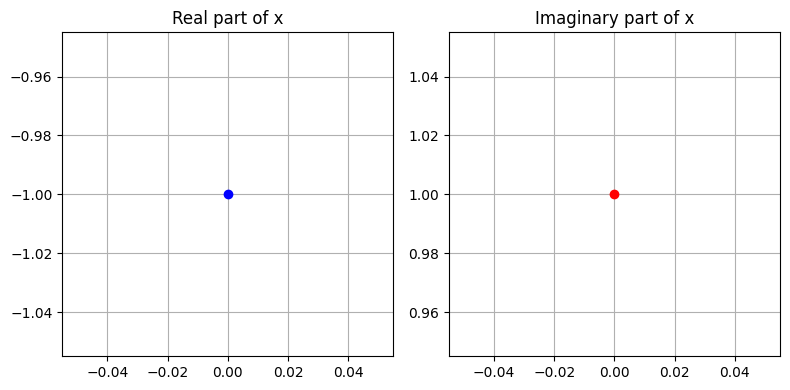

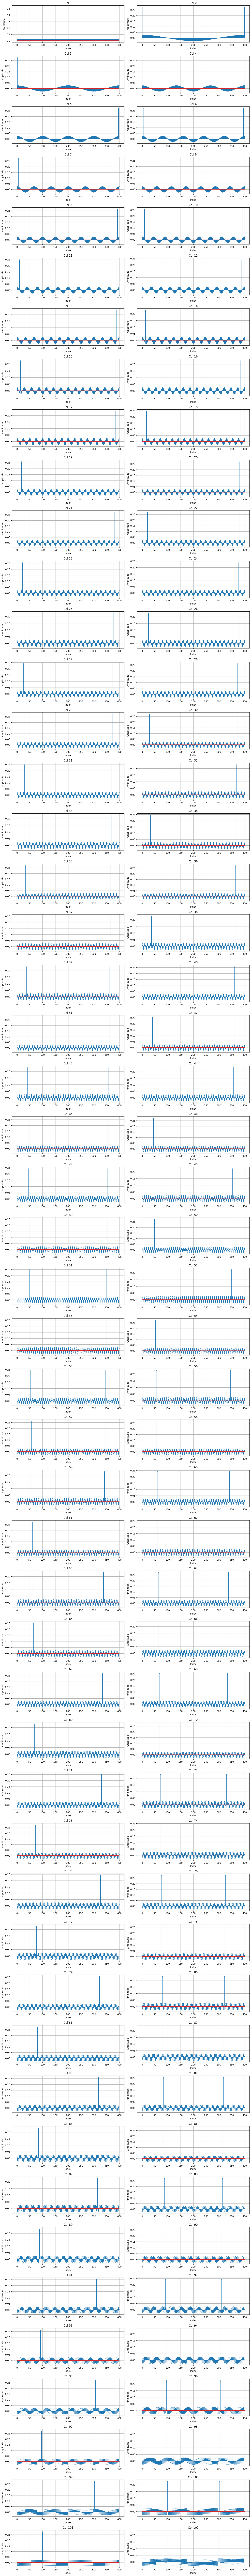

In [ ]:

# Plot first (m+2) columns of P1 in a grid with 2 columns
num_cols = 2
num_plots = m + 2
num_rows = int(np.ceil(num_plots / num_cols))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3 * num_rows))
axes = axes.flatten()

for k in range(num_plots):
    markerline, stemlines, baseline = axes[k].stem(P1[:, k])
    markerline.set_markersize(1)  # Control marker ("ball") size
    axes[k].set_title(f'Col {k+1}')
    axes[k].set_xlabel('Index')
    axes[k].set_ylabel('Amplitude')
    axes[k].grid(True)

# Hide unused subplots
for i in range(num_plots, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


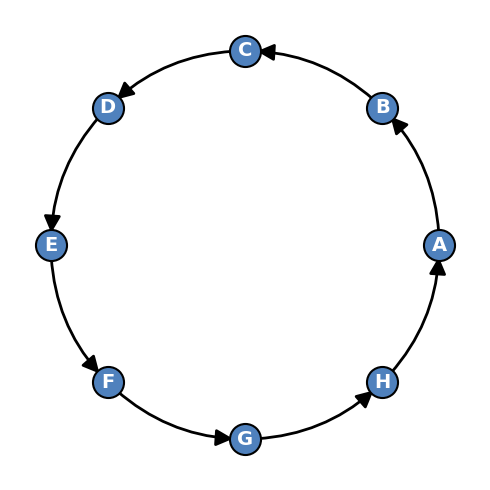

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create directed graph
G = nx.DiGraph()
num_nodes = 8
edges = [(i, (i + 1) % num_nodes) for i in range(num_nodes)]
G.add_edges_from(edges)

# Use circular layout
pos = nx.circular_layout(G)

# Set up figure
plt.figure(figsize=(5, 5))

# Draw nodes with custom style
nx.draw_networkx_nodes(G, pos,
                       node_size=500,
                       node_color="#4F81BD",
                       edgecolors='black',
                       linewidths=1.5)

# Use custom labels: A to H
labels = {i: chr(65 + i) for i in range(num_nodes)}  # A-H
nx.draw_networkx_labels(G, pos, labels,
                        font_size=14,
                        font_color='white',
                        font_weight='bold')

# Draw edges with curved arrows for clarity
nx.draw_networkx_edges(G, pos,
                       edgelist=edges,
                       edge_color='black',
                       connectionstyle='arc3,rad=0.2',
                       arrows=True,
                       arrowsize=25,
                       arrowstyle='-|>',
                       width=2)

# Final plot tweaks
#plt.title("Directed Cycle with 8 Nodes (Circular Layout)", fontsize=16, pad=20)
plt.axis('off')
plt.tight_layout()
plt.savefig("directed_cycle_edge.pdf", format='pdf')
plt.show()


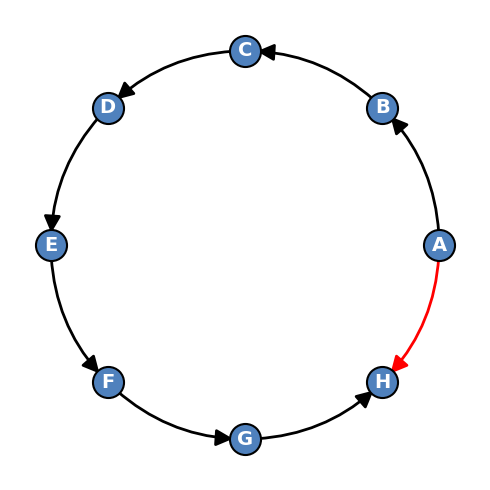

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create directed graph
G = nx.DiGraph()
num_nodes = 8

# Normal cycle edges excluding the last
edges = [(i, (i + 1) % num_nodes) for i in range(num_nodes - 1)]

# Reversed last edge: 0 → 7 (instead of 7 → 0)
reversed_edge = (0, 7)

# Add edges to graph
G.add_edges_from(edges)
G.add_edge(*reversed_edge)

# Use circular layout
pos = nx.circular_layout(G)

# Set up figure
plt.figure(figsize=(5, 5))

# Draw nodes
nx.draw_networkx_nodes(G, pos,
                       node_size=500,
                       node_color="#4F81BD",
                       edgecolors='black',
                       linewidths=1.5)

# Labels: A to H
labels = {i: chr(65 + i) for i in range(num_nodes)}
nx.draw_networkx_labels(G, pos, labels,
                        font_size=14,
                        font_color='white',
                        font_weight='bold')

# Draw regular black edges (with positive curvature)
nx.draw_networkx_edges(G, pos,
                       edgelist=edges,
                       edge_color='black',
                       connectionstyle='arc3,rad=0.2',
                       arrows=True,
                       arrowsize=25,
                       arrowstyle='-|>',
                       width=2)

# Draw reversed red edge along the circle with negative curvature
nx.draw_networkx_edges(G, pos,
                       #edgelist=edges,
                       edgelist=[reversed_edge],
                       edge_color='red',
                       connectionstyle='arc3,rad=-0.2',
                       arrows=True,
                       arrowsize=25,
                       arrowstyle='-|>',
                       width=2)

# Save as PDF
#plt.title("Directed Cycle with Reversed Last Edge (Curved Red)", fontsize=14, pad=20)
plt.axis('off')
plt.tight_layout()
plt.savefig("directed_cycle_reversed_edge.pdf", format='pdf')
plt.show()
